<a href="https://colab.research.google.com/github/MerveKaragulTabas/DL--Deep-Learning/blob/main/DL_Assignment_1_(Classification_with_ANN_Churn_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

## Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Improt Libraries

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf


%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format = '{:,.2f}'.format

# Importing plotly and cufflinks in offline mode
import plotly.express as px
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.warn("this will not show")

# Figure & Display options
plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
import matplotlib.colors as mcolors
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

from termcolor import colored
import missingno as msno 

# Import Pandas Profiling
import pandas_profiling

In [84]:
!pip install keras==2.6.0

## Indest Data

In [85]:
df = pd.read_csv("Churn_Modelling.csv")

## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [86]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [88]:
df.isnull().sum().any()

False

In [89]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,"10,000.00","5,000.50","2,886.90",1.00,"2,500.75","5,000.50","7,500.25","10,000.00"
CustomerId,"10,000.00","15,690,940.57","71,936.19","15,565,701.00","15,628,528.25","15,690,738.00","15,753,233.75","15,815,690.00"
CreditScore,"10,000.00",650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,"10,000.00",38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,"10,000.00",5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,"10,000.00","76,485.89","62,397.41",0.00,0.00,"97,198.54","127,644.24","250,898.09"
NumOfProducts,"10,000.00",1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,"10,000.00",0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,"10,000.00",0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,"10,000.00","100,090.24","57,510.49",11.58,"51,002.11","100,193.91","149,388.25","199,992.48"


In [90]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [91]:
df.shape

(10000, 11)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,"10,000.00",650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,"10,000.00",38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,"10,000.00",5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,"10,000.00","76,485.89","62,397.41",0.00,0.00,"97,198.54","127,644.24","250,898.09"
NumOfProducts,"10,000.00",1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,"10,000.00",0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,"10,000.00",0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,"10,000.00","100,090.24","57,510.49",11.58,"51,002.11","100,193.91","149,388.25","199,992.48"
Exited,"10,000.00",0.20,0.40,0.00,0.00,0.00,0.00,1.00


CreditScore



In [94]:
fig = px.box(df, x="CreditScore")
fig.show()

Geography

In [95]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Gender



In [96]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

Age

In [97]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

Tenure

In [98]:
fig = px.box(df, x="Tenure")
fig.show()

Balance

In [99]:
fig = px.box(df, x="Balance")
fig.show()

NumOfProducts

In [100]:
fig = px.box(df, x="NumOfProducts")
fig.show()

HasCrCard

In [101]:
df.HasCrCard.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

IsActiveMember

In [102]:
df.IsActiveMember.value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

EstimatedSalary 

In [103]:
fig = px.box(df, x="EstimatedSalary")
fig.show()

Exited

In [104]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [105]:
fig = px.pie(df, values=df.Exited.value_counts(), names=["No","Yes"],width=450, height=400, color_discrete_sequence=["red", "green"])
fig.show()

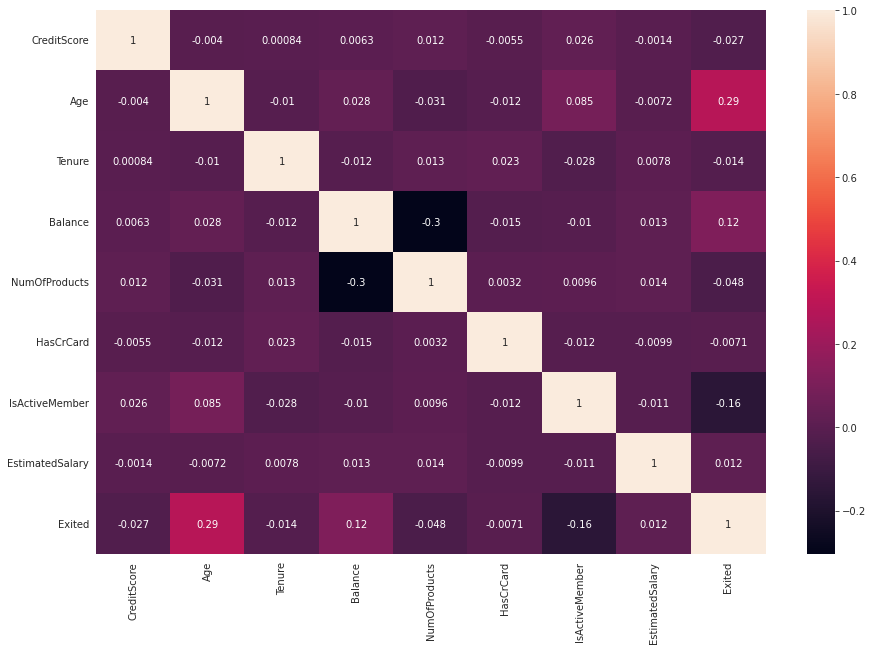

In [106]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True);

In [107]:
df = pd.get_dummies(df, drop_first=True)

In [108]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,"101,348.88",1,0,0,0
1,608,41,1,"83,807.86",1,0,1,"112,542.58",0,0,1,0
2,502,42,8,"159,660.80",3,1,0,"113,931.57",1,0,0,0
3,699,39,1,0.00,2,0,0,"93,826.63",0,0,0,0
4,850,43,2,"125,510.82",1,1,1,"79,084.10",0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,"96,270.64",0,0,0,1
9996,516,35,10,"57,369.61",1,1,1,"101,699.77",0,0,0,1
9997,709,36,7,0.00,1,0,1,"42,085.58",1,0,0,0
9998,772,42,3,"75,075.31",2,1,0,"92,888.52",1,1,0,1


In [109]:
df.shape

(10000, 12)

## Preprocessing of Data
- Train | Test Split, Scalling

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [111]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

In [112]:
seed=42

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)

In [114]:
from sklearn.preprocessing import MinMaxScaler 

In [115]:
scaler = MinMaxScaler()

In [116]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

### Import related libraries

In [117]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [118]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [119]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [120]:
X_train.shape

(9000, 11)

In [121]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(18, activation = 'relu', input_dim = X_train.shape[1]))
#model.add(Activation("relu")) # Activation function can be added separately as a different line after each layer.  
model.add(Dense(18, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [122]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20)

In [123]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
254/254 [==============================] - 5s 6ms/step - loss: 0.5841 - accuracy: 0.7940 - val_loss: 0.4652 - val_accuracy: 0.8033
Epoch 2/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.4676 - accuracy: 0.7972 - val_loss: 0.4446 - val_accuracy: 0.8111
Epoch 3/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.4551 - accuracy: 0.8004 - val_loss: 0.4286 - val_accuracy: 0.8144
Epoch 4/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.4409 - accuracy: 0.8088 - val_loss: 0.4131 - val_accuracy: 0.8256
Epoch 5/1000
254/254 [==============================] - 2s 9ms/step - loss: 0.4223 - accuracy: 0.8144 - val_loss: 0.3973 - val_accuracy: 0.8322
Epoch 6/1000
254/254 [==============================] - 2s 8ms/step - loss: 0.4074 - accuracy: 0.8194 - val_loss: 0.3855 - val_accuracy: 0.8322
Epoch 7/1000
254/254 [==============================] - 2s 8ms/step - loss: 0.3984 - accuracy: 0.8258 - val_loss: 0.3757 - val_accuracy:

In [124]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 18)                216       
_________________________________________________________________
dense_1 (Dense)              (None, 18)                342       
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 171       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 10        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 2         
Total params: 741
Trainable params: 741
Non-trainable params: 0
_________________________________________________________________


In [125]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.58,0.79,0.47,0.80
1,0.47,0.80,0.44,0.81
2,0.46,0.80,0.43,0.81
3,0.44,0.81,0.41,0.83
4,0.42,0.81,0.40,0.83


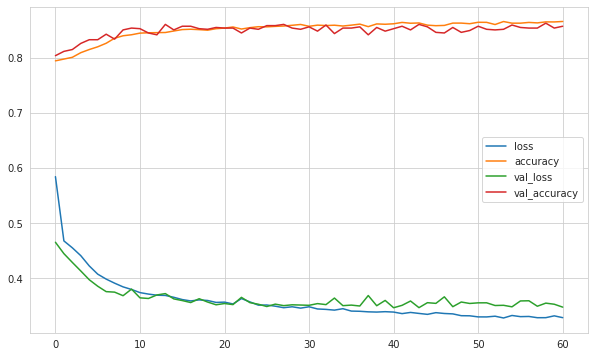

In [126]:
loss_df.plot();

In [127]:
model.evaluate(X_test, y_test, verbose=0)  

[0.34031161665916443, 0.8529999852180481]

In [128]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.34031161665916443
accuracy :  0.8529999852180481


In [129]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")   

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[772  37]
 [110  81]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       809
           1       0.69      0.42      0.52       191

    accuracy                           0.85      1000
   macro avg       0.78      0.69      0.72      1000
weighted avg       0.84      0.85      0.84      1000



In [130]:
from sklearn.utils import class_weight

In [131]:
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve

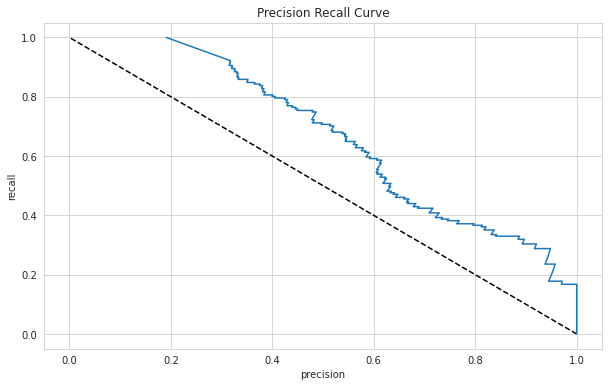

In [132]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()

In [133]:
precision_recall_curve(y_test, y_pred_proba)

(array([0.191     , 0.31711712, 0.31768953, 0.3164557 , 0.31702899,
        0.31578947, 0.31454545, 0.3151184 , 0.31569343, 0.31627057,
        0.31684982, 0.31743119, 0.31801471, 0.31860037, 0.31918819,
        0.31977819, 0.32037037, 0.32096475, 0.3197026 , 0.32029795,
        0.32089552, 0.31962617, 0.32022472, 0.32082552, 0.32142857,
        0.3220339 , 0.32264151, 0.32325142, 0.32386364, 0.32447818,
        0.32509506, 0.32571429, 0.32633588, 0.3250478 , 0.3256705 ,
        0.32629559, 0.325     , 0.3256262 , 0.32625483, 0.32688588,
        0.32751938, 0.32815534, 0.32879377, 0.3294347 , 0.33007812,
        0.33072407, 0.32941176, 0.33005894, 0.33070866, 0.33136095,
        0.33201581, 0.33267327, 0.33134921, 0.33001988, 0.33067729,
        0.33133733, 0.332     , 0.33266533, 0.3313253 , 0.33199195,
        0.33266129, 0.33333333, 0.3340081 , 0.3326572 , 0.33333333,
        0.33401222, 0.33469388, 0.33537832, 0.33606557, 0.33675565,
        0.33744856, 0.33814433, 0.33884298, 0.33

In [134]:
from tensorflow.keras.callbacks import EarlyStopping

In [135]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(18, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [136]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [137]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
254/254 [==============================] - 3s 6ms/step - loss: 0.5196 - accuracy: 0.7844 - val_loss: 0.4459 - val_accuracy: 0.8000
Epoch 2/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.4546 - accuracy: 0.7946 - val_loss: 0.4294 - val_accuracy: 0.8111
Epoch 3/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.4377 - accuracy: 0.8047 - val_loss: 0.4158 - val_accuracy: 0.8333
Epoch 4/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.4201 - accuracy: 0.8188 - val_loss: 0.4150 - val_accuracy: 0.8256
Epoch 5/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.4053 - accuracy: 0.8228 - val_loss: 0.3962 - val_accuracy: 0.8344
Epoch 6/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.3888 - accuracy: 0.8353 - val_loss: 0.3856 - val_accuracy: 0.8444
Epoch 7/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.3768 - accuracy: 0.8417 - val_loss: 0.3699 - val_accuracy:

In [138]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 18)                216       
_________________________________________________________________
dense_6 (Dense)              (None, 18)                342       
_________________________________________________________________
dense_7 (Dense)              (None, 9)                 171       
_________________________________________________________________
dense_8 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 10        
Total params: 829
Trainable params: 829
Non-trainable params: 0
_________________________________________________________________


In [139]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.52,0.78,0.45,0.80
1,0.45,0.79,0.43,0.81
2,0.44,0.80,0.42,0.83
3,0.42,0.82,0.42,0.83
4,0.41,0.82,0.40,0.83


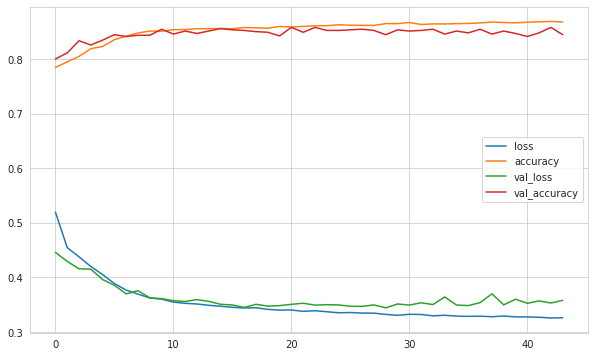

In [140]:
loss_df.plot();

In [141]:
model.evaluate(X_test, y_test, verbose=0)

[0.3390105962753296, 0.8569999933242798]

In [142]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3390105962753296
accuracy :  0.8569999933242798


In [143]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)   
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[773  36]
 [107  84]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       809
           1       0.70      0.44      0.54       191

    accuracy                           0.86      1000
   macro avg       0.79      0.70      0.73      1000
weighted avg       0.84      0.86      0.84      1000



In [144]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier

In [145]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [146]:
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "auto", verbose = 1, patience = 15)

In [147]:
tf.random.set_seed(seed)

In [148]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

In [149]:
parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

In [150]:
grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

In [153]:
grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Epoch 1/200
127/127 [==============================] - 2s 7ms/step - loss: 0.4835 - accuracy: 0.7957 - val_loss: 0.4364 - val_accuracy: 0.8111
Epoch 2/200
127/127 [==============================] - 1s 5ms/step - loss: 0.4498 - accuracy: 0.8028 - val_loss: 0.4184 - val_accuracy: 0.8211
Epoch 3/200
127/127 [==============================] - 1s 5ms/step - loss: 0.4301 - accuracy: 0.8132 - val_loss: 0.4091 - val_accuracy: 0.8289
Epoch 4/200
127/127 [==============================] - 1s 5ms/step - loss: 0.4141 - accuracy: 0.8209 - val_loss: 0.4035 - val_accuracy: 0.8322
Epoch 5/200
127/127 [==============================] - 1s 5ms/step - loss: 0.4023 - accuracy: 0.8256 - val_loss: 0.3860 - val_accuracy: 0.8389
Epoch 6/200
127/127 [==============================] - 1s 5ms/step - loss: 0.3897 - accuracy: 0.8316 - val_loss: 0.3814 - val_accuracy: 0.8378
Epoch 7/200
127/127 [==============================] - 1s 5ms/step - loss: 0.37

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7ff13d184b90>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy', verbose=1)

In [154]:
grid_model.best_score_

0.8607777777777776

In [155]:
grid_model.best_params_

{'batch_size': 64,
 'learn_rate': 0.003,
 'optimizer': keras.optimizer_v2.nadam.Nadam}

In [156]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]]
grid_result

,mean_test_score,std_test_score,rank_test_score,params
0,0.86,0.01,2,"{'batch_size': 32, 'learn_rate': 0.001, 'optimizer': <class 'keras.optimizer_v2.adam.Adam'>}"
1,0.86,0.01,10,"{'batch_size': 32, 'learn_rate': 0.001, 'optimizer': <class 'keras.optimizer_v2.rmsprop.RMSprop'>}"
2,0.73,0.18,24,"{'batch_size': 32, 'learn_rate': 0.001, 'optimizer': <class 'keras.optimizer_v2.adadelta.Adadelta'>}"
3,0.86,0.01,9,"{'batch_size': 32, 'learn_rate': 0.001, 'optimizer': <class 'keras.optimizer_v2.nadam.Nadam'>}"
4,0.86,0.01,4,"{'batch_size': 32, 'learn_rate': 0.003, 'optimizer': <class 'keras.optimizer_v2.adam.Adam'>}"
5,0.85,0.01,16,"{'batch_size': 32, 'learn_rate': 0.003, 'optimizer': <class 'keras.optimizer_v2.rmsprop.RMSprop'>}"
6,0.79,0.01,19,"{'batch_size': 32, 'learn_rate': 0.003, 'optimizer': <class 'keras.optimizer_v2.adadelta.Adadelta'>}"
7,0.86,0.01,12,"{'batch_size': 32, 'learn_rate': 0.003, 'optimizer': <class 'keras.optimizer_v2.nadam.Nadam'>}"
8,0.86,0.01,5,"{'batch_size': 32, 'learn_rate': 0.005, 'optimizer': <class 'keras.optimizer_v2.adam.Adam'>}"
9,0.86,0.02,13,"{'batch_size': 32, 'learn_rate': 0.005, 'optimizer': <class 'keras.optimizer_v2.rmsprop.RMSprop'>}"


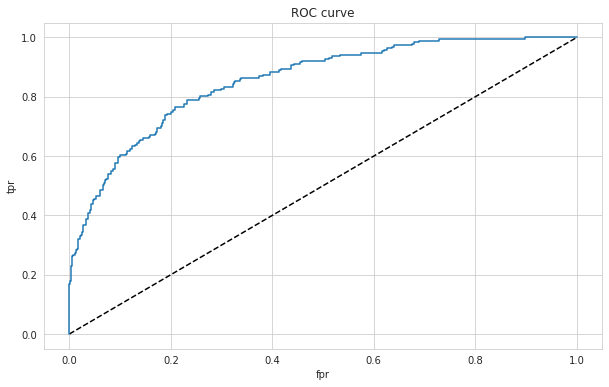

In [157]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [158]:
roc_auc_score(y_test, y_pred_proba)

0.8549175182340036

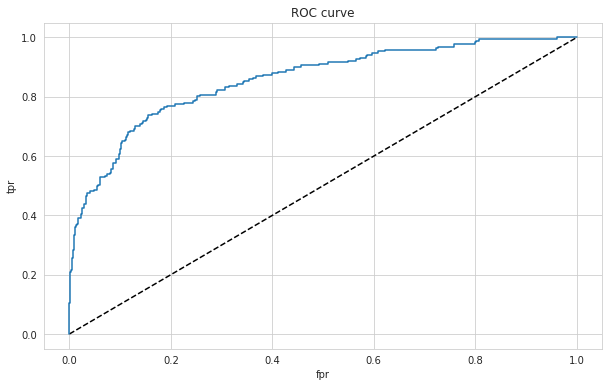

In [159]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [160]:
roc_auc_score(y_test, y_pred_proba)

0.8567878383888067

In [161]:
import pickle
pickle.dump(scaler, open("scaler_churn", 'wb'))

In [162]:
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "auto", verbose = 1, patience = 15)

In [163]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
282/282 [==============================] - 3s 10ms/step - loss: 0.3290 - accuracy: 0.8658 - val_loss: 0.3426 - val_accuracy: 0.8570
Epoch 2/1000
282/282 [==============================] - 2s 9ms/step - loss: 0.3275 - accuracy: 0.8657 - val_loss: 0.3479 - val_accuracy: 0.8470
Epoch 3/1000
282/282 [==============================] - 2s 7ms/step - loss: 0.3283 - accuracy: 0.8660 - val_loss: 0.3310 - val_accuracy: 0.8590
Epoch 4/1000
282/282 [==============================] - 2s 7ms/step - loss: 0.3278 - accuracy: 0.8657 - val_loss: 0.3317 - val_accuracy: 0.8620
Epoch 5/1000
282/282 [==============================] - 2s 7ms/step - loss: 0.3268 - accuracy: 0.8666 - val_loss: 0.3287 - val_accuracy: 0.8640
Epoch 6/1000
282/282 [==============================] - 2s 6ms/step - loss: 0.3273 - accuracy: 0.8658 - val_loss: 0.3377 - val_accuracy: 0.8530
Epoch 7/1000
282/282 [==============================] - 1s 4ms/step - loss: 0.3265 - accuracy: 0.8664 - val_loss: 0.3384 - val_accuracy

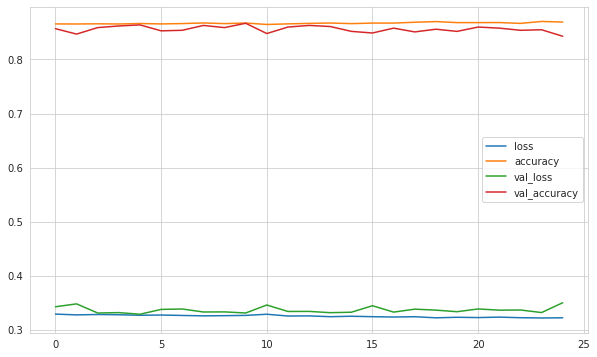

In [164]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [165]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.35002806782722473
accuracy :  0.8429999947547913


In [166]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[738  71]
 [ 86 105]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       809
           1       0.60      0.55      0.57       191

    accuracy                           0.84      1000
   macro avg       0.75      0.73      0.74      1000
weighted avg       0.84      0.84      0.84      1000



In [167]:
import pickle
pickle.dump(scaler, open("scaler_churn", 'wb'))

In [168]:
model.save('model_churn.h5')

In [169]:
from tensorflow.keras.models import load_model

In [170]:
model_churn = load_model('model_churn.h5')
scaler_churn = pickle.load(open("scaler_churn", "rb"))

In [171]:
single_churn = df.drop('Exited', axis = 1).iloc[10:15, :]
single_churn

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
10,528,31,6,"102,016.72",2,0,0,"80,181.12",0,0,1
11,497,24,3,0.00,2,1,0,"76,390.01",0,1,1
12,476,34,10,0.00,2,1,0,"26,260.98",0,0,0
13,549,25,5,0.00,2,0,0,"190,857.79",0,0,0
14,635,35,7,0.00,2,1,1,"65,951.65",0,1,0


In [172]:
single_churn = scaler_churn.transform(single_churn)
single_churn

array([[0.356     , 0.17567568, 0.6       , 0.4066062 , 0.33333333,
        0.        , 0.        , 0.40092957, 0.        , 0.        ,
        1.        ],
       [0.294     , 0.08108108, 0.3       , 0.        , 0.33333333,
        1.        , 0.        , 0.38197015, 0.        , 1.        ,
        1.        ],
       [0.252     , 0.21621622, 1.        , 0.        , 0.33333333,
        1.        , 0.        , 0.13127381, 0.        , 0.        ,
        0.        ],
       [0.398     , 0.09459459, 0.5       , 0.        , 0.33333333,
        0.        , 0.        , 0.95442594, 0.        , 0.        ,
        0.        ],
       [0.57      , 0.22972973, 0.7       , 0.        , 0.33333333,
        1.        , 1.        , 0.32976769, 0.        , 1.        ,
        0.        ]])

In [173]:
prediction = (pd.DataFrame(model_churn.predict(single_churn) > 0.5, columns=["prediction"]).astype("int32"))
prediction

,prediction
0,0
1,0
2,0
3,0
4,0


In [174]:
actual = pd.DataFrame(df.sample(n=5, random_state=101)["Exited"]).rename({'Exited': 'actual'}, axis=1).astype("int32")
actual

,actual
6676,0
6421,0
9834,1
8492,0
9982,1


In [175]:
pred_df = actual.join(prediction.set_index(actual.index))
pred_df

,actual,prediction
6676,0,0
6421,0,0
9834,1,0
8492,0,0
9982,1,0


In [176]:
pred_df['prediction_accuracy'] = pred_df.apply(lambda x: "Correct Pred" if int(x['actual'] == x['prediction']) else "Wrong Pred", axis=1)
pred_df

,actual,prediction,prediction_accuracy
6676,0,0,Correct Pred
6421,0,0,Correct Pred
9834,1,0,Wrong Pred
8492,0,0,Correct Pred
9982,1,0,Wrong Pred


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___